In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import io
from PIL import Image

In [2]:
# Enable MLflow 

# Set the artifact folder path
artifact_dir = os.path.abspath("artifacts")

# Ensure the folder exists
os.makedirs(artifact_dir, exist_ok=True)

# Set MLflow artifact URI to use this folder
# mlflow.set_tracking_uri("file://" + artifact_dir)
mlflow.set_tracking_uri("http://localhost:5000")

# Create or use an experiment
mlflow.set_experiment("Iris_ML_Experiment")

KeyboardInterrupt: 

In [259]:
artifact_dir = os.path.abspath("artifacts")
print(artifact_dir)

/Users/lisa/PyCharmMiscProject/artifacts


In [2]:
column_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
df = pd.read_csv('iris.data.csv', names=column_names, header=None)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(3)

In [8]:
df.drop_duplicates(inplace=True)
df['Species'].value_counts()

Species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

<Axes: >

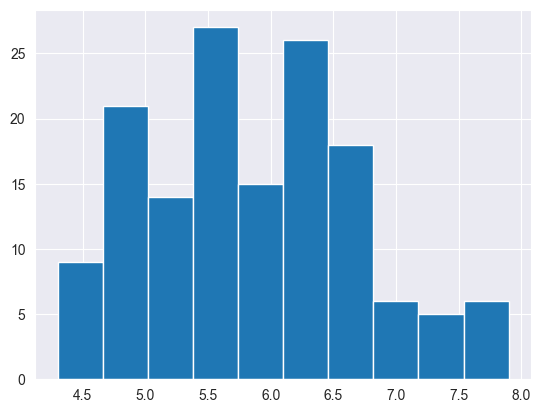

In [9]:
df['SepalLengthCm'].hist()

<Axes: >

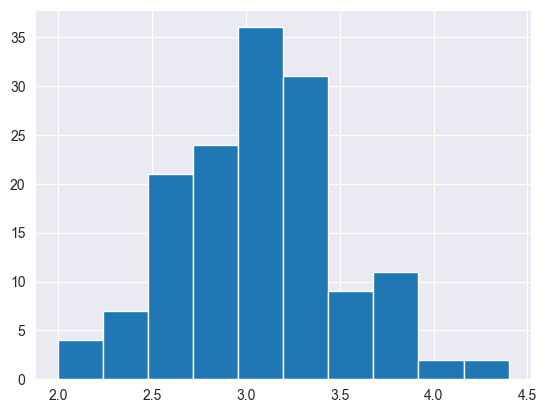

In [10]:
df['SepalWidthCm'].hist()

<Axes: >

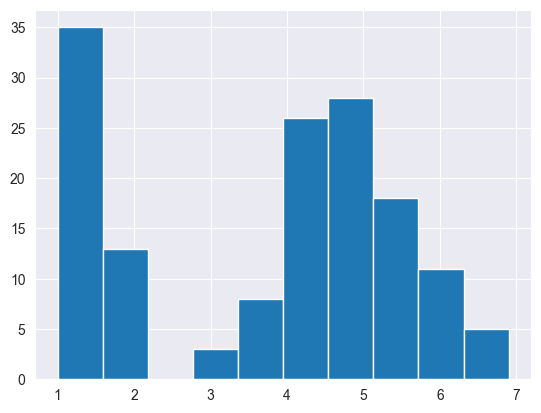

In [11]:
df['PetalLengthCm'].hist()

<Axes: >

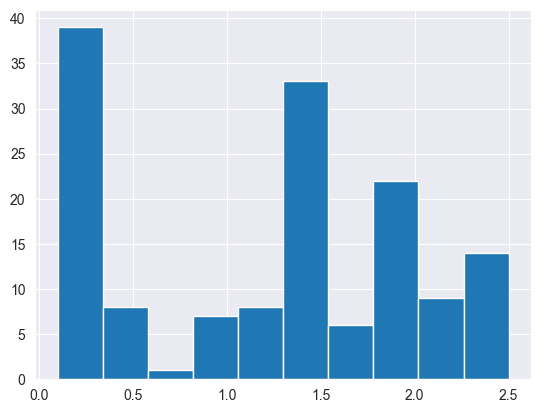

In [12]:
df['PetalWidthCm'].hist()

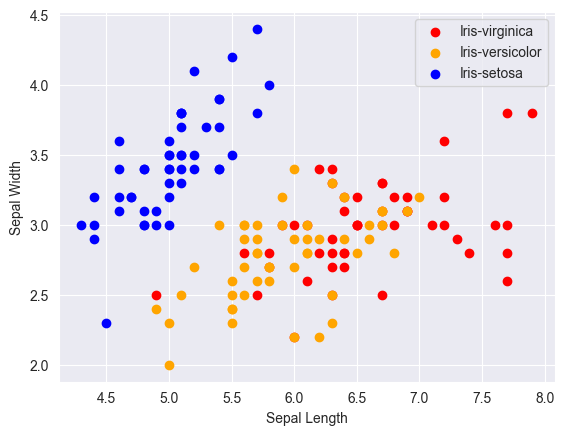

In [13]:
colors=['red','orange','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c= colors[i],label=species[i])
    
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

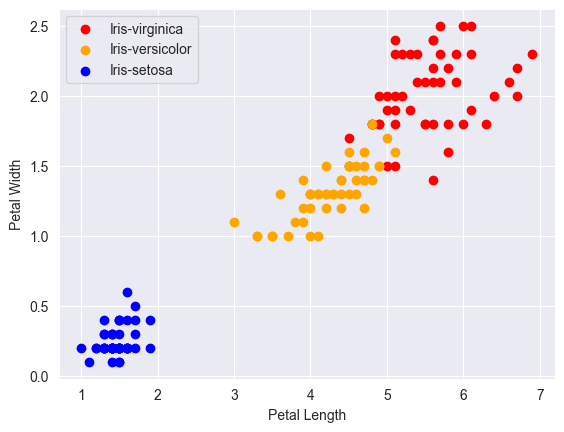

In [14]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c= colors[i],label=species[i])
    
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

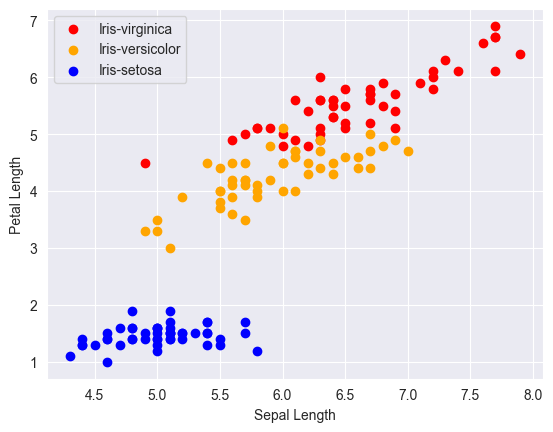

In [15]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c= colors[i],label=species[i])
    
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

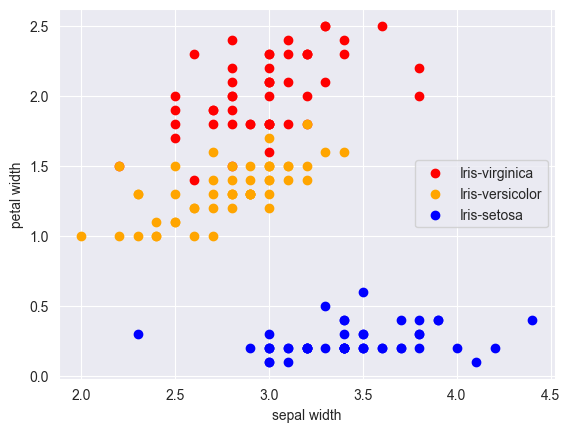

In [16]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c= colors[i],label=species[i])
    
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.legend()

/Users/lisa/Iris-ML-analysis/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


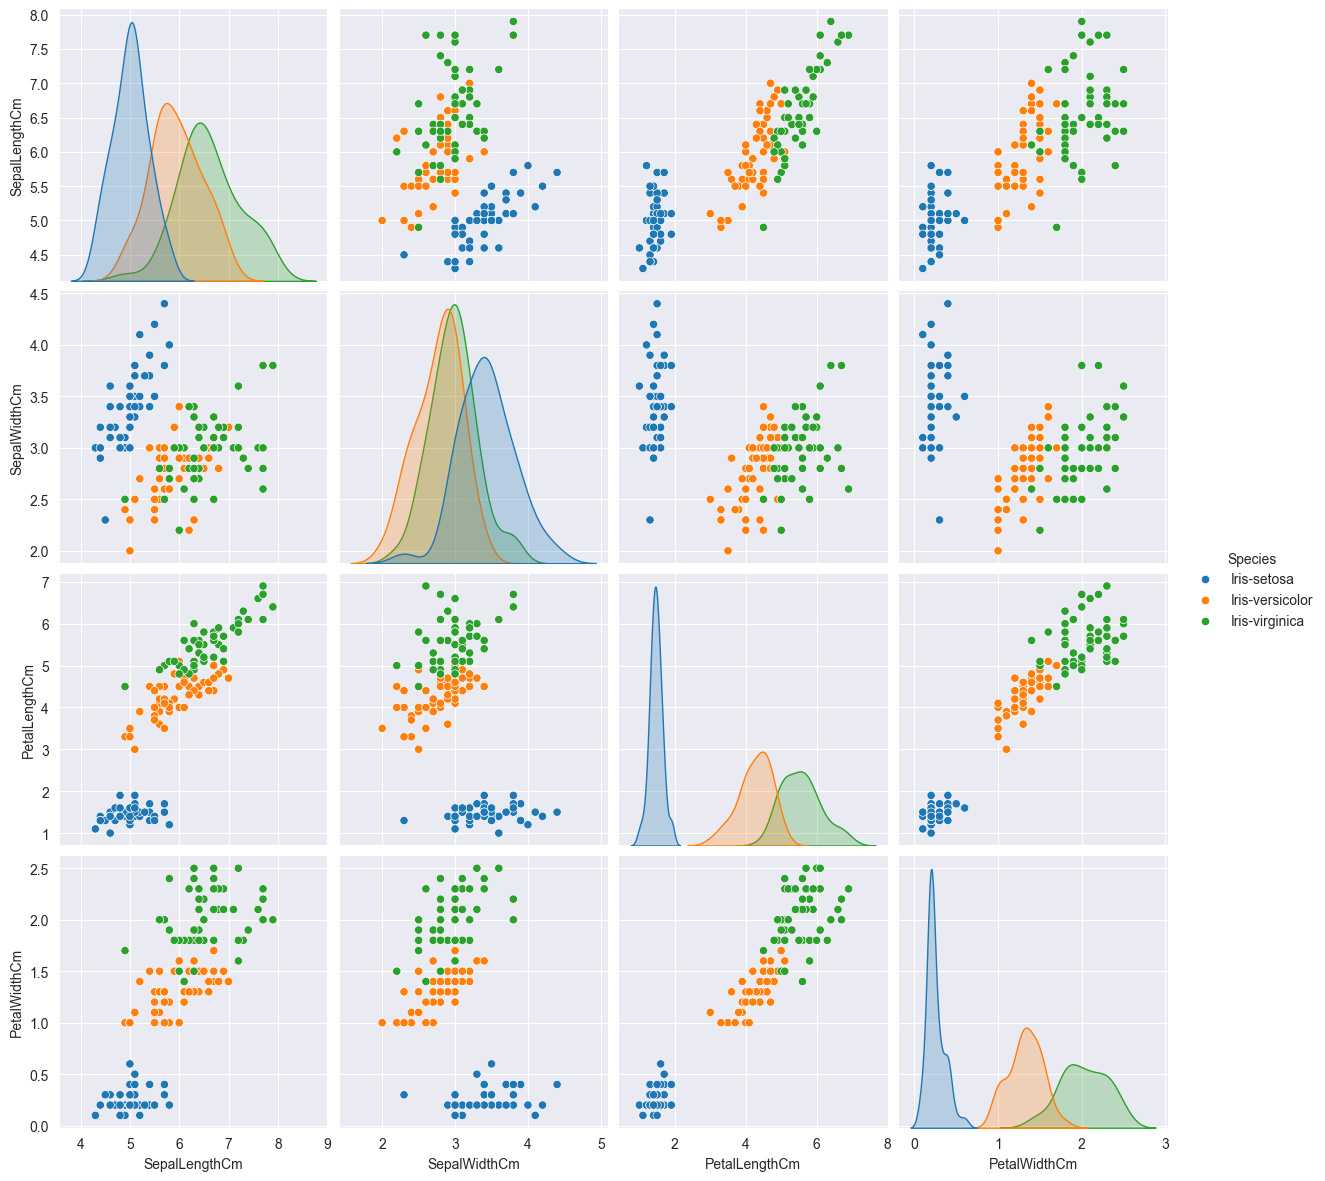

In [18]:
sns.pairplot(df, hue="Species", size=3)

<Axes: >

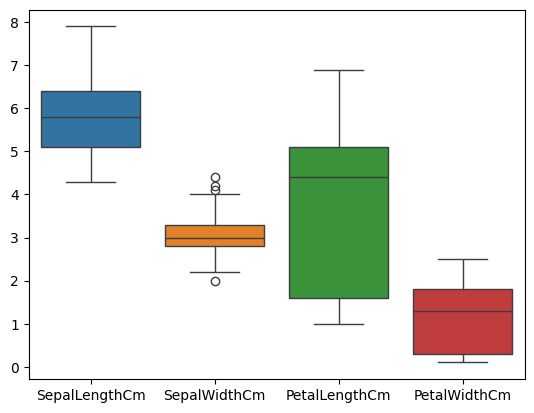

In [276]:
sns.boxplot(df)

<Axes: >

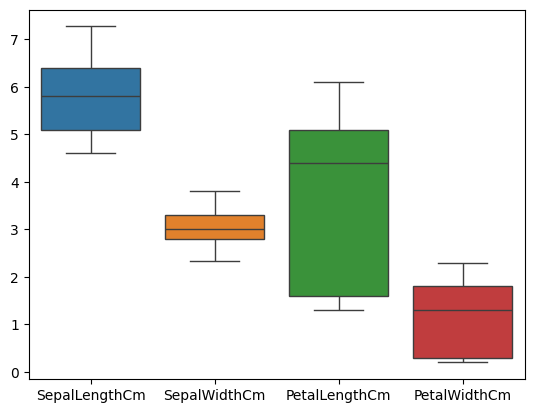

In [277]:
### Winsorizing
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_cleaned = df.copy()
df_cleaned[numeric_columns] = df[numeric_columns].clip(df[numeric_columns].quantile(0.05), df[numeric_columns].quantile(0.95), axis=1)
sns.boxplot(df_cleaned)

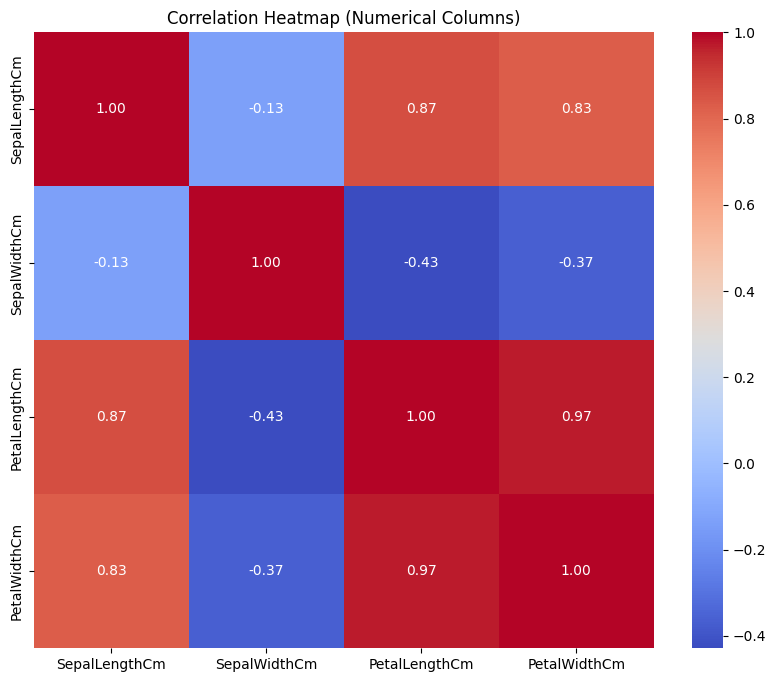

In [278]:
correlation_matrix=df_cleaned.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

In [279]:
df_cleaned['SepalWidthCm'].skew()

np.float64(0.1520055517356248)

In [280]:
df_cleaned['SepalLengthCm'].skew()

np.float64(0.147006251207068)

In [281]:
df_cleaned['PetalLengthCm'].skew()

np.float64(-0.350806756130978)

In [282]:
df_cleaned['PetalWidthCm'].skew()

np.float64(-0.14604811394115902)

In [283]:
le = LabelEncoder()
df_cleaned['Species_encoded'] = le.fit_transform(df_cleaned['Species'])
df1 = df_cleaned.drop(columns=["Species"], axis=1)
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [284]:
numeric_df = df1.select_dtypes(include=[np.number])
correlation_with_target = numeric_df.corr()["Species_encoded"].drop("Species_encoded")
correlation_with_target

SepalLengthCm    0.793245
SepalWidthCm    -0.419703
PetalLengthCm    0.951297
PetalWidthCm     0.958400
Name: Species_encoded, dtype: float64

In [285]:
### Calculate the R² between each feature and the target variable
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Select numeric features (excluding the target)
numeric_features = numeric_df.drop(columns=["Species_encoded"])

r2_results = {}

# Loop through each feature
for feature in numeric_features.columns:
    X = df1[[feature]].values
    y = df1["Species_encoded"].values
    
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    r2 = r2_score(y, y_pred)
    r2_results[feature] = r2

# Display R² values
r2_df = pd.DataFrame.from_dict(r2_results, orient='index', columns=['R²']).sort_values(by='R²', ascending=False)
print(r2_df)

                     R²
PetalWidthCm   0.918530
PetalLengthCm  0.904966
SepalLengthCm  0.629238
SepalWidthCm   0.176151


In [286]:
### PetalWidthCm and PetalLengthCm both have the biggest correlation with target variable and the biggest R².
### Also, they are highly correlated to each other
### I am going to use only PetalWidthCm for prediction of the target variable and compare performance with models when we use all variables

In [287]:
# Feature/target split
X = df1.drop("Species_encoded", axis=1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [288]:
y = df1["Species_encoded"]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species_encoded, Length: 147, dtype: int64

In [289]:
### Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [290]:
X_one_feature = df1["PetalWidthCm"].to_frame()
X_one_feature = scaler.fit_transform(X_one_feature)

In [291]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [292]:
# Train/test split for PetalWidthCm only
X_train_onefeature, X_test_onefeature, y_train_onefeature, y_test_onefeature = train_test_split(X_one_feature, y, test_size=0.2, random_state=42, stratify=y)

In [293]:
# Train/test split for not processed data
y_raw = df['Species']
X_raw = df.drop(columns=['Species'], axis=1)
X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42, stratify=y)

In [294]:
### Logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)

y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_train, y_pred_train)

test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_test, y_pred_test)

print(f"\n--- Logistic Regression ---")
print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)


--- Logistic Regression ---
Training Accuracy: 0.9572649572649573
Training Precision: 0.9574405055791448
Training Recall: 0.9572649572649573
Training F1 Score: 0.9572512535475498
Training Confusion Matrix:
[[38  0  0]
 [ 0 38  2]
 [ 0  3 36]]

Testing Accuracy: 0.9333333333333333
Testing Precision: 0.9333333333333333
Testing Recall: 0.9333333333333333
Testing F1 Score: 0.9333333333333333
Testing Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


/Users/lisa/PyCharmMiscProject/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [295]:
### Logistic regression for not processed data
log_reg.fit(X_raw_train, y_raw_train)

y_pred_train = log_reg.predict(X_raw_train)
y_pred_test = log_reg.predict(X_raw_test)

train_accuracy = accuracy_score(y_raw_train, y_pred_train)
train_precision = precision_score(y_raw_train, y_pred_train, average='weighted')
train_recall = recall_score(y_raw_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_raw_train, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_raw_train, y_pred_train)

test_accuracy = accuracy_score(y_raw_test, y_pred_test)
test_precision = precision_score(y_raw_test, y_pred_test, average='weighted')
test_recall = recall_score(y_raw_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_raw_test, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_raw_test, y_pred_test)

print(f"\n--- Logistic Regression ---")
print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)


--- Logistic Regression ---
Training Accuracy: 0.9743589743589743
Training Precision: 0.9745671707210168
Training Recall: 0.9743589743589743
Training F1 Score: 0.9743589743589743
Training Confusion Matrix:
[[38  0  0]
 [ 0 38  2]
 [ 0  1 38]]

Testing Accuracy: 0.9666666666666667
Testing Precision: 0.9696969696969696
Testing Recall: 0.9666666666666667
Testing F1 Score: 0.9665831244778613
Testing Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


/Users/lisa/PyCharmMiscProject/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [296]:
### Logistic regression for model with 1 feature 
log_reg.fit(X_train_onefeature, y_train_onefeature)

y_pred_train = log_reg.predict(X_train_onefeature)
y_pred_test = log_reg.predict(X_test_onefeature)

train_accuracy = accuracy_score(y_train_onefeature, y_pred_train)
train_precision = precision_score(y_train_onefeature, y_pred_train, average='weighted')
train_recall = recall_score(y_train_onefeature, y_pred_train, average='weighted')
train_f1 = f1_score(y_train_onefeature, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_train_onefeature, y_pred_train)

test_accuracy = accuracy_score(y_test_onefeature, y_pred_test)
test_precision = precision_score(y_test_onefeature, y_pred_test, average='weighted')
test_recall = recall_score(y_test_onefeature, y_pred_test, average='weighted')
test_f1 = f1_score(y_test_onefeature, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_test_onefeature, y_pred_test)

print(f"\n--- Logistic Regression ---")
print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)


--- Logistic Regression ---
Training Accuracy: 0.9658119658119658
Training Precision: 0.9665709665709665
Training Recall: 0.9658119658119658
Training F1 Score: 0.9657790505030556
Training Confusion Matrix:
[[38  0  0]
 [ 0 39  1]
 [ 0  3 36]]

Testing Accuracy: 0.9333333333333333
Testing Precision: 0.9333333333333333
Testing Recall: 0.9333333333333333
Testing F1 Score: 0.9333333333333333
Testing Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


/Users/lisa/PyCharmMiscProject/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [298]:
### Model comparison
models = {
    "Logistic regression with preprocessing": [X_train, y_train, X_test, y_test],
    "Logistic regression without preprocessing": [X_raw_train, y_raw_train, X_raw_test, y_raw_test],
    "Logistic regression with PetalWidthCm only": [X_train_onefeature, y_train_onefeature, X_test_onefeature, y_test_onefeature]
}
results = []
for model_name, arr in models.items():
    with mlflow.start_run(run_name=model_name) as run:
        print("Active run ID:", run.info.run_id)
        log_reg.fit(arr[0], arr[1])
        y_pred_train = log_reg.predict(arr[0])
        y_pred_test = log_reg.predict(arr[2])
        
        train_accuracy = accuracy_score(arr[1], y_pred_train)
        test_accuracy = accuracy_score(arr[3], y_pred_test)
        test_precision = precision_score(arr[3], y_pred_test, average='weighted')
        test_recall = recall_score(arr[3], y_pred_test, average='weighted')
        test_f1 = f1_score(arr[3], y_pred_test, average='weighted')
        conf_mat = confusion_matrix(arr[3], y_pred_test)

        # Log metrics
        mlflow.log_metric("train_accuracy", train_accuracy)
        mlflow.log_metric("test_accuracy", test_accuracy)
        mlflow.log_metric("test_precision", test_precision)
        mlflow.log_metric("test_recall", test_recall)
        mlflow.log_metric("test_f1_score", test_f1)

        # Log model
        
        input_example = pd.DataFrame(arr[0][0:1], columns=df.columns if arr[0].shape[1] == len(df.columns) else None)
        mlflow.sklearn.log_model(sk_model=log_reg, artifact_path="model", input_example=input_example, signature=mlflow.models.signature.infer_signature(arr[0], y_pred_test))

        # Log confusion matrix as image
        plt.figure(figsize=(5, 4))
        sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
        plt.title(f"{model_name} - Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()

        # Save plot to in-memory buffer and log
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        image = Image.open(buf)
        image.save("conf_matrix.png")
        mlflow.log_artifact("conf_matrix.png")
        buf.close()
        plt.close()
    
    results.append({
        "Model": model_name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1 Score": test_f1
    })
results_df = pd.DataFrame(results)
results_df

Active run ID: 83eb58d104c24230be4be11f2d69803a


/Users/lisa/PyCharmMiscProject/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
2025/08/07 14:12:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/Users/lisa/PyCharmMiscProject/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
2025/08/07 14:13:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run Logistic regression with preprocessing at: http://localhost:5000/#/experiments/1/runs/83eb58d104c24230be4be11f2d69803a
🧪 View experiment at: http://localhost:5000/#/experiments/1
Active run ID: cd4218256b9b4881a50c8cd474aee27e


/Users/lisa/PyCharmMiscProject/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
2025/08/07 14:13:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run Logistic regression without preprocessing at: http://localhost:5000/#/experiments/1/runs/cd4218256b9b4881a50c8cd474aee27e
🧪 View experiment at: http://localhost:5000/#/experiments/1
Active run ID: c8f3f44b018f4ab7bc3db53eaeb801fa
🏃 View run Logistic regression with PetalWidthCm only at: http://localhost:5000/#/experiments/1/runs/c8f3f44b018f4ab7bc3db53eaeb801fa
🧪 View experiment at: http://localhost:5000/#/experiments/1


,Model,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,Logistic regression with preprocessing,0.957265,0.933333,0.933333,0.933333,0.933333
1,Logistic regression without preprocessing,0.974359,0.966667,0.969697,0.966667,0.966583
2,Logistic regression with PetalWidthCm only,0.965812,0.933333,0.933333,0.933333,0.933333


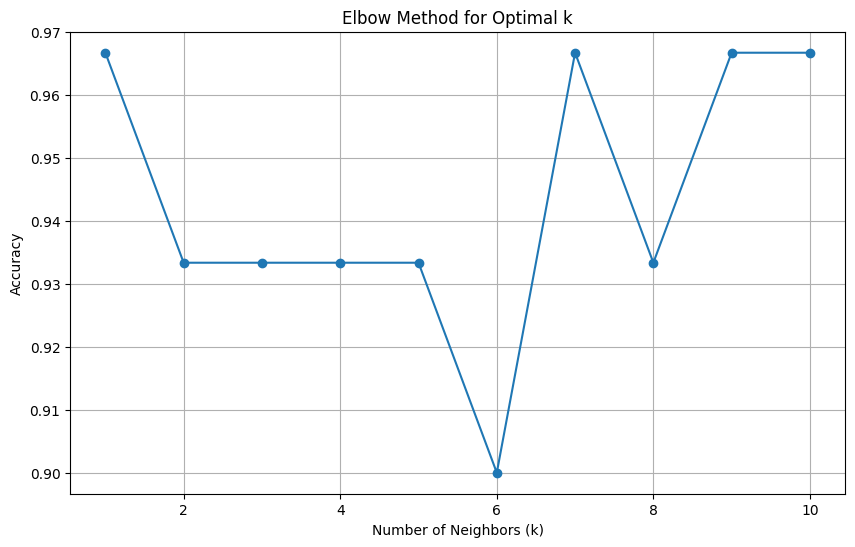

In [299]:
### KNN
### Elbow Method for Optimal k
from sklearn.neighbors import KNeighborsClassifier

accuracy_values = []
max_neighbors = 10  
for k in range(1, max_neighbors + 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_neighbors + 1), accuracy_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [305]:
# Train the KNN model with the optimal k
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [306]:
# Evaluate the model
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [307]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)

Training Accuracy: 0.9658119658119658
Training Precision: 0.9665709665709665
Training Recall: 0.9658119658119658
Training F1 Score: 0.9657790505030556
Training Confusion Matrix:
[[38  0  0]
 [ 0 39  1]
 [ 0  3 36]]

Testing Accuracy: 0.9666666666666667
Testing Precision: 0.9696969696969696
Testing Recall: 0.9666666666666667
Testing F1 Score: 0.9665831244778613
Testing Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


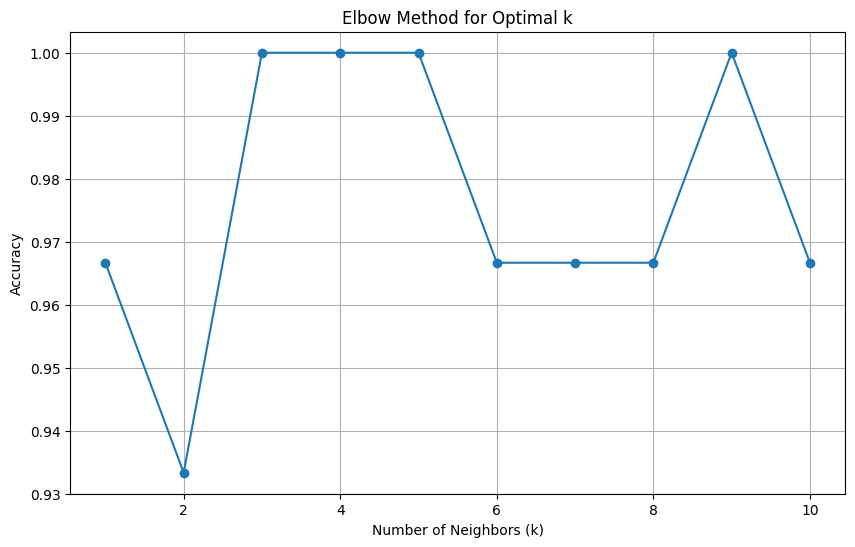

In [308]:
### Performance check for not processed data
### Elbow Method for Optimal k
from sklearn.neighbors import KNeighborsClassifier

accuracy_values_raw = []
max_neighbors = 10  
for k in range(1, max_neighbors + 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_raw_train, y_raw_train)
    y_raw_pred = knn.predict(X_raw_test)
    accuracy = accuracy_score(y_raw_test, y_raw_pred)
    accuracy_values_raw.append(accuracy)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_neighbors + 1), accuracy_values_raw, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [309]:
### Performance check for not processed data
# Train the KNN model with the optimal k
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_raw_train, y_raw_train)

# Evaluate the model
y_pred_train = knn.predict(X_raw_train)
y_pred_test = knn.predict(X_raw_test)

train_accuracy = accuracy_score(y_raw_train, y_pred_train)
train_precision = precision_score(y_raw_train, y_pred_train, average='weighted')
train_recall = recall_score(y_raw_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_raw_train, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_raw_train, y_pred_train)
test_accuracy = accuracy_score(y_raw_test, y_pred_test)
test_precision = precision_score(y_raw_test, y_pred_test, average='weighted')
test_recall = recall_score(y_raw_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_raw_test, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_raw_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)


Training Accuracy: 0.9572649572649573
Training Precision: 0.9574405055791448
Training Recall: 0.9572649572649573
Training F1 Score: 0.9572512535475498
Training Confusion Matrix:
[[38  0  0]
 [ 0 38  2]
 [ 0  3 36]]

Testing Accuracy: 1.0
Testing Precision: 1.0
Testing Recall: 1.0
Testing F1 Score: 1.0
Testing Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


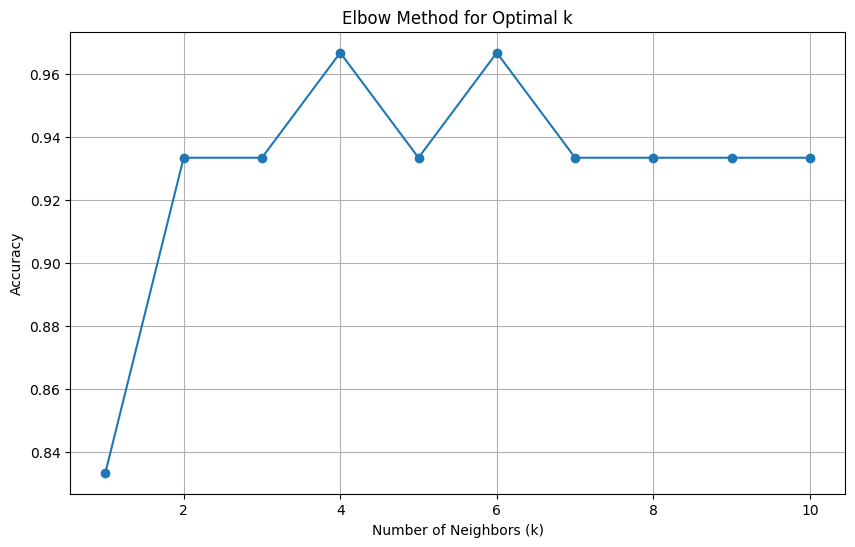

In [310]:
### Performance check for model with 1 feature
accuracy_values_raw = []
max_neighbors = 10  
for k in range(1, max_neighbors + 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_onefeature, y_train_onefeature)
    y_pred_onefeature = knn.predict(X_test_onefeature)
    accuracy = accuracy_score(y_test_onefeature, y_pred_onefeature)
    accuracy_values_raw.append(accuracy)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_neighbors + 1), accuracy_values_raw, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [311]:
### Performance check for model with 1 feature
# Train the KNN model with the optimal k
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_onefeature, y_train_onefeature)

# Evaluate the model
y_pred_train = knn.predict(X_train_onefeature)
y_pred_test = knn.predict(X_test_onefeature)

train_accuracy = accuracy_score(y_train_onefeature, y_pred_train)
train_precision = precision_score(y_train_onefeature, y_pred_train, average='weighted')
train_recall = recall_score(y_train_onefeature, y_pred_train, average='weighted')
train_f1 = f1_score(y_train_onefeature, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_train_onefeature, y_pred_train)
test_accuracy = accuracy_score(y_test_onefeature, y_pred_test)
test_precision = precision_score(y_test_onefeature, y_pred_test, average='weighted')
test_recall = recall_score(y_test_onefeature, y_pred_test, average='weighted')
test_f1 = f1_score(y_test_onefeature, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_test_onefeature, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)


Training Accuracy: 0.9572649572649573
Training Precision: 0.9589379182402437
Training Recall: 0.9572649572649573
Training F1 Score: 0.9571825764596849
Training Confusion Matrix:
[[38  0  0]
 [ 0 39  1]
 [ 0  4 35]]

Testing Accuracy: 0.9666666666666667
Testing Precision: 0.9696969696969696
Testing Recall: 0.9666666666666667
Testing F1 Score: 0.9665831244778613
Testing Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


In [312]:
### Model comparison
models = {
    "K-Nearest Neighbors with preprocessing": [X_train, y_train, X_test, y_test, 7],
    "K-Nearest Neighbors without preprocessing": [X_raw_train, y_raw_train, X_raw_test, y_raw_test, 3],
    "K-Nearest Neighbors with PetalWidthCm only": [X_train_onefeature, y_train_onefeature, X_test_onefeature, y_test_onefeature, 4]
}
results = []
for model_name, arr in models.items():
    with mlflow.start_run(run_name=model_name) as run:
        model = KNeighborsClassifier(n_neighbors=arr[4])
        model.fit(arr[0], arr[1])
        y_pred_train = model.predict(arr[0])
        y_pred_test = model.predict(arr[2])
        
        train_accuracy = accuracy_score(arr[1], y_pred_train)
        test_accuracy = accuracy_score(arr[3], y_pred_test)
        test_precision = precision_score(arr[3], y_pred_test, average='weighted')
        test_recall = recall_score(arr[3], y_pred_test, average='weighted')
        test_f1 = f1_score(arr[3], y_pred_test, average='weighted')
        conf_mat = confusion_matrix(arr[3], y_pred_test)

        # Log metrics
        mlflow.log_metric("train_accuracy", train_accuracy)
        mlflow.log_metric("test_accuracy", test_accuracy)
        mlflow.log_metric("test_precision", test_precision)
        mlflow.log_metric("test_recall", test_recall)
        mlflow.log_metric("test_f1_score", test_f1)

        # Log parameters
        params = model.get_params()
        mlflow.log_params(params)

        # Log model
        input_example = pd.DataFrame(arr[0][0:1], columns=df.columns if arr[0].shape[1] == len(df.columns) else None)
        mlflow.sklearn.log_model(sk_model=model, artifact_path="model", input_example=input_example, signature=mlflow.models.signature.infer_signature(arr[0], y_pred_test))

        # Log confusion matrix as image
        plt.figure(figsize=(5, 4))
        sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
        plt.title(f"{model_name} - Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()

        # Save plot to in-memory buffer and log
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        image = Image.open(buf)
        image.save("conf_matrix.png")
        mlflow.log_artifact("conf_matrix.png")
        buf.close()
        plt.close()
    
    results.append({
        "Model": model_name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1 Score": test_f1
    })
results_df = pd.DataFrame(results)
results_df

2025/08/07 16:03:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/07 16:03:59 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run K-Nearest Neighbors with preprocessing at: http://localhost:5000/#/experiments/1/runs/cc796cef37d0480c97f23cb6b5d45f0c
🧪 View experiment at: http://localhost:5000/#/experiments/1


2025/08/07 16:04:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run K-Nearest Neighbors without preprocessing at: http://localhost:5000/#/experiments/1/runs/45b0193546f14a2d9b2fed53f1a7847e
🧪 View experiment at: http://localhost:5000/#/experiments/1
🏃 View run K-Nearest Neighbors with PetalWidthCm only at: http://localhost:5000/#/experiments/1/runs/d8a26c5430504ab48d1ef8f25d626af7
🧪 View experiment at: http://localhost:5000/#/experiments/1


,Model,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,K-Nearest Neighbors with preprocessing,0.965812,0.966667,0.969697,0.966667,0.966583
1,K-Nearest Neighbors without preprocessing,0.957265,1.000000,1.000000,1.000000,1.000000
2,K-Nearest Neighbors with PetalWidthCm only,0.957265,0.966667,0.969697,0.966667,0.966583


In [313]:
### DecisionTree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [314]:
best_params

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [315]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_dt_regressor = DecisionTreeClassifier(**best_params)
best_dt_regressor.fit(X_train, y_train)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [316]:
y_pred_train = best_dt_regressor.predict(X_train)
y_pred_test = best_dt_regressor.predict(X_test)

In [317]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)

Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1 Score: 1.0
Training Confusion Matrix:
[[38  0  0]
 [ 0 40  0]
 [ 0  0 39]]

Testing Accuracy: 0.9333333333333333
Testing Precision: 0.9333333333333333
Testing Recall: 0.9333333333333333
Testing F1 Score: 0.9333333333333333
Testing Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


In [318]:
### Performance check for not processed data
### DecisionTree
grid_search.fit(X_raw_train, y_raw_train)
best_params_raw = grid_search.best_params_
best_dt_regressor = DecisionTreeClassifier(**best_params_raw)
best_dt_regressor.fit(X_raw_train, y_raw_train)

y_pred_train = best_dt_regressor.predict(X_raw_train)
y_pred_test = best_dt_regressor.predict(X_raw_test)

train_accuracy = accuracy_score(y_raw_train, y_pred_train)
train_precision = precision_score(y_raw_train, y_pred_train, average='weighted')
train_recall = recall_score(y_raw_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_raw_train, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_raw_train, y_pred_train)
test_accuracy = accuracy_score(y_raw_test, y_pred_test)
test_precision = precision_score(y_raw_test, y_pred_test, average='weighted')
test_recall = recall_score(y_raw_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_raw_test, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_raw_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1 Score: 1.0
Training Confusion Matrix:
[[38  0  0]
 [ 0 40  0]
 [ 0  0 39]]

Testing Accuracy: 0.9666666666666667
Testing Precision: 0.9696969696969696
Testing Recall: 0.9666666666666667
Testing F1 Score: 0.9665831244778613
Testing Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [319]:
### Performance check for model with PetalWidthCm only
### DecisionTree
grid_search.fit(X_train_onefeature, y_train_onefeature)
best_params_onefeature = grid_search.best_params_
best_dt_regressor = DecisionTreeClassifier(**best_params_onefeature)
best_dt_regressor.fit(X_train_onefeature, y_train_onefeature)

y_pred_train = best_dt_regressor.predict(X_train_onefeature)
y_pred_test = best_dt_regressor.predict(X_test_onefeature)

train_accuracy = accuracy_score(y_train_onefeature, y_pred_train)
train_precision = precision_score(y_train_onefeature, y_pred_train, average='weighted')
train_recall = recall_score(y_train_onefeature, y_pred_train, average='weighted')
train_f1 = f1_score(y_train_onefeature, y_train_onefeature, average='weighted')
train_confusion = confusion_matrix(y_train_onefeature, y_pred_train)
test_accuracy = accuracy_score(y_test_onefeature, y_pred_test)
test_precision = precision_score(y_test_onefeature, y_pred_test, average='weighted')
test_recall = recall_score(y_test_onefeature, y_pred_test, average='weighted')
test_f1 = f1_score(y_test_onefeature, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_test_onefeature, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Training Accuracy: 0.9658119658119658
Training Precision: 0.9665709665709665
Training Recall: 0.9658119658119658
Training F1 Score: 1.0
Training Confusion Matrix:
[[38  0  0]
 [ 0 39  1]
 [ 0  3 36]]

Testing Accuracy: 0.9333333333333333
Testing Precision: 0.9333333333333333
Testing Recall: 0.9333333333333333
Testing F1 Score: 0.9333333333333333
Testing Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


In [320]:
### Performance check
### DecisionTree
### Model comparison
models = {
    "Decision Tree with preprocessing": [X_train, y_train, X_test, y_test, best_params],
    "Decision Tree without preprocessing": [X_raw_train, y_raw_train, X_raw_test, y_raw_test, best_params_raw],
    "Decision Tree with PetalWidthCm only": [X_train_onefeature, y_train_onefeature, X_test_onefeature, y_test_onefeature, best_params_onefeature]
}
results = []
for model_name, arr in models.items():
    with mlflow.start_run(run_name=model_name) as run:
        model = DecisionTreeClassifier(**arr[4])
        model.fit(arr[0], arr[1])
        y_pred_train = model.predict(arr[0])
        y_pred_test = model.predict(arr[2])
        
        train_accuracy = accuracy_score(arr[1], y_pred_train)
        test_accuracy = accuracy_score(arr[3], y_pred_test)
        test_precision = precision_score(arr[3], y_pred_test, average='weighted')
        test_recall = recall_score(arr[3], y_pred_test, average='weighted')
        test_f1 = f1_score(arr[3], y_pred_test, average='weighted')
        conf_mat = confusion_matrix(arr[3], y_pred_test)

        # Log metrics
        mlflow.log_metric("train_accuracy", train_accuracy)
        mlflow.log_metric("test_accuracy", test_accuracy)
        mlflow.log_metric("test_precision", test_precision)
        mlflow.log_metric("test_recall", test_recall)
        mlflow.log_metric("test_f1_score", test_f1)

        # Log parameters
        mlflow.log_params(arr[4])

        # Log model
        input_example = pd.DataFrame(arr[0][0:1], columns=df.columns if arr[0].shape[1] == len(df.columns) else None)
        mlflow.sklearn.log_model(sk_model=model, artifact_path="model", input_example=input_example, signature=mlflow.models.signature.infer_signature(arr[0], y_pred_test))

        # Log confusion matrix as image
        plt.figure(figsize=(5, 4))
        sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
        plt.title(f"{model_name} - Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()

        # Save plot to in-memory buffer and log
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        image = Image.open(buf)
        image.save("conf_matrix.png")
        mlflow.log_artifact("conf_matrix.png")
        buf.close()
        plt.close()

    
    
    results.append({
        "Model": model_name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1 Score": test_f1
    })
results_df = pd.DataFrame(results)
results_df

2025/08/07 16:45:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/07 16:45:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run Decision Tree with preprocessing at: http://localhost:5000/#/experiments/1/runs/f4d592afac974b579d7b89da4777ac68
🧪 View experiment at: http://localhost:5000/#/experiments/1


2025/08/07 16:45:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run Decision Tree without preprocessing at: http://localhost:5000/#/experiments/1/runs/eb50cea44caa4c859d2684fc485f6763
🧪 View experiment at: http://localhost:5000/#/experiments/1
🏃 View run Decision Tree with PetalWidthCm only at: http://localhost:5000/#/experiments/1/runs/c53b9bace4b9442bb2a442f718fc9bfd
🧪 View experiment at: http://localhost:5000/#/experiments/1


,Model,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,Decision Tree with preprocessing,1.000000,0.933333,0.933333,0.933333,0.933333
1,Decision Tree without preprocessing,1.000000,0.933333,0.933333,0.933333,0.933333
2,Decision Tree with PetalWidthCm only,0.965812,0.933333,0.933333,0.933333,0.933333


In [321]:
### RandomForest
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_classifier = grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [322]:
best_classifier

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,10
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [323]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_rf_regressor = RandomForestClassifier(**best_params)
best_rf_regressor.fit(X_train, y_train)

# Evaluate the model
y_pred_train = best_rf_regressor.predict(X_train)
y_pred_test = best_rf_regressor.predict(X_test)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [324]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)

Training Accuracy: 0.9743589743589743
Training Precision: 0.9745671707210168
Training Recall: 0.9743589743589743
Training F1 Score: 0.9743589743589743
Training Confusion Matrix:
[[38  0  0]
 [ 0 38  2]
 [ 0  1 38]]

Testing Accuracy: 0.9333333333333333
Testing Precision: 0.9333333333333333
Testing Recall: 0.9333333333333333
Testing F1 Score: 0.9333333333333333
Testing Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


In [325]:
### Performance check for not processed data
### RandomForest
grid_search.fit(X_raw_train, y_raw_train)
best_params_raw = grid_search.best_params_
best_rf_regressor = RandomForestClassifier(**best_params_raw)
best_rf_regressor.fit(X_raw_train, y_raw_train)

# Evaluate the model
y_pred_train = best_rf_regressor.predict(X_raw_train)
y_pred_test = best_rf_regressor.predict(X_raw_test)

train_accuracy = accuracy_score(y_raw_train, y_pred_train)
train_precision = precision_score(y_raw_train, y_pred_train, average='weighted')
train_recall = recall_score(y_raw_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_raw_train, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_raw_train, y_pred_train)
test_accuracy = accuracy_score(y_raw_test, y_pred_test)
test_precision = precision_score(y_raw_test, y_pred_test, average='weighted')
test_recall = recall_score(y_raw_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_raw_test, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_raw_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Training Accuracy: 0.9829059829059829
Training Precision: 0.983739837398374
Training Recall: 0.9829059829059829
Training F1 Score: 0.9829005040543503
Training Confusion Matrix:
[[38  0  0]
 [ 0 38  2]
 [ 0  0 39]]

Testing Accuracy: 0.9666666666666667
Testing Precision: 0.9696969696969696
Testing Recall: 0.9666666666666667
Testing F1 Score: 0.9665831244778613
Testing Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [326]:
### Performance check for model with PetalWidthCm only 
### RandomForest
grid_search.fit(X_train_onefeature, y_train_onefeature)
best_params_onefeature = grid_search.best_params_
best_rf_regressor = RandomForestClassifier(**best_params_onefeature)
best_rf_regressor.fit(X_train_onefeature, y_train_onefeature)

# Evaluate the model
y_pred_train = best_rf_regressor.predict(X_train_onefeature)
y_pred_test = best_rf_regressor.predict(X_test_onefeature)

train_accuracy = accuracy_score(y_train_onefeature, y_pred_train)
train_precision = precision_score(y_train_onefeature, y_pred_train, average='weighted')
train_recall = recall_score(y_train_onefeature, y_pred_train, average='weighted')
train_f1 = f1_score(y_train_onefeature, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_train_onefeature, y_pred_train)
test_accuracy = accuracy_score(y_test_onefeature, y_pred_test)
test_precision = precision_score(y_test_onefeature, y_pred_test, average='weighted')
test_recall = recall_score(y_test_onefeature, y_pred_test, average='weighted')
test_f1 = f1_score(y_test_onefeature, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_test_onefeature, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Training Accuracy: 0.9658119658119658
Training Precision: 0.9665709665709665
Training Recall: 0.9658119658119658
Training F1 Score: 0.9657790505030556
Training Confusion Matrix:
[[38  0  0]
 [ 0 39  1]
 [ 0  3 36]]

Testing Accuracy: 0.9333333333333333
Testing Precision: 0.9333333333333333
Testing Recall: 0.9333333333333333
Testing F1 Score: 0.9333333333333333
Testing Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


In [327]:
### Performance check 
### RandomForest
### Model comparison
models = {
    "Random Forest with preprocessing": [X_train, y_train, X_test, y_test, best_params],
    "Random Forest without preprocessing": [X_raw_train, y_raw_train, X_raw_test, y_raw_test, best_params_raw],
    "Random Forest with PetalWidthCm only": [X_train_onefeature, y_train_onefeature, X_test_onefeature, y_test_onefeature, best_params_onefeature]
}
results = []
for model_name, arr in models.items():
    with mlflow.start_run(run_name=model_name) as run:
        model = RandomForestClassifier(**arr[4])
        model.fit(arr[0], arr[1])
        y_pred_train = model.predict(arr[0])
        y_pred_test = model.predict(arr[2])
        
        train_accuracy = accuracy_score(arr[1], y_pred_train)
        test_accuracy = accuracy_score(arr[3], y_pred_test)
        test_precision = precision_score(arr[3], y_pred_test, average='weighted')
        test_recall = recall_score(arr[3], y_pred_test, average='weighted')
        test_f1 = f1_score(arr[3], y_pred_test, average='weighted')
        conf_mat = confusion_matrix(arr[3], y_pred_test)

        # Log metrics
        mlflow.log_metric("train_accuracy", train_accuracy)
        mlflow.log_metric("test_accuracy", test_accuracy)
        mlflow.log_metric("test_precision", test_precision)
        mlflow.log_metric("test_recall", test_recall)
        mlflow.log_metric("test_f1_score", test_f1)

        # Log parameters
        mlflow.log_params(arr[4])

        # Log model
        input_example = pd.DataFrame(arr[0][0:1], columns=df.columns if arr[0].shape[1] == len(df.columns) else None)
        mlflow.sklearn.log_model(sk_model=model, artifact_path="model", input_example=input_example, signature=mlflow.models.signature.infer_signature(arr[0], y_pred_test))

        # Log confusion matrix as image
        plt.figure(figsize=(5, 4))
        sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
        plt.title(f"{model_name} - Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()

        # Save plot to in-memory buffer and log
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        image = Image.open(buf)
        image.save("conf_matrix.png")
        mlflow.log_artifact("conf_matrix.png")
        buf.close()
        plt.close()

        
    
    results.append({
        "Model": model_name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1 Score": test_f1
    })
results_df = pd.DataFrame(results)
results_df

2025/08/07 16:47:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/07 16:47:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run Random Forest with preprocessing at: http://localhost:5000/#/experiments/1/runs/fd46390e3e7747e790763eca2baa1e63
🧪 View experiment at: http://localhost:5000/#/experiments/1


2025/08/07 16:47:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run Random Forest without preprocessing at: http://localhost:5000/#/experiments/1/runs/ebe40564909b418095159f6f4a5724fc
🧪 View experiment at: http://localhost:5000/#/experiments/1
🏃 View run Random Forest with PetalWidthCm only at: http://localhost:5000/#/experiments/1/runs/75c73b70f64d47a7bfe8e59fa8c55f3b
🧪 View experiment at: http://localhost:5000/#/experiments/1


,Model,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,Random Forest with preprocessing,0.974359,0.966667,0.969697,0.966667,0.966583
1,Random Forest without preprocessing,0.991453,0.966667,0.969697,0.966667,0.966583
2,Random Forest with PetalWidthCm only,0.965812,0.933333,0.933333,0.933333,0.933333


In [328]:
### Model comparison of KNN, Decision Tree, Random Forest and Logistic Regression
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200, random_state=42)
}

results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')
    
    results.append({
        "Model": model_name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1 Score": test_f1
    })
results_df = pd.DataFrame(results)
results_df

/Users/lisa/PyCharmMiscProject/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,Model,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,Random Forest,1.000000,0.966667,0.969697,0.966667,0.966583
1,Decision Tree,1.000000,0.933333,0.933333,0.933333,0.933333
2,K-Nearest Neighbors,0.965812,0.933333,0.944444,0.933333,0.932660
3,Logistic Regression,0.957265,0.933333,0.933333,0.933333,0.933333
